# Project Insurance Domain | Car accident risk assessments

Here is the paper containg the datasets : https://dutangc.perso.math.cnrs.fr/RRepository/pub/web/CASdatasets-manual.pdf#page=56&zoom=100,133,256

## Datasets description 
Datasets from the same database of an unknown private motor portfolio observed between January 2003 and December 2004

respectively :

- freq -> claim frequency databases
- sev -> claim severity databases
- prem -> premium databases

Here is the description for each dataset :
**prem**

| Variable       | Description |
| --------       | ----------- |
| IDpol          | Le numéro d'identifiant de la police |
| DrivAge        | L'âge du conducteur, en années |
| DriveGener     | Le sexe du conducteur (facteur) |
| MaritalStatus  | Le statut marital (facteur) |
| BonusMalus     | Le bonus-malus |
| LicenceNb      | Le numéro de permis de conduire |
| Payfreq        | La fréquence des paiements (facteur) |
| JobCode        | Un code correspondant à la profession (facteur) |
| VehAge         | L'âge du véhicule, en années |
| VehClass       | Le type de véhicule (facteur) |
| VehPower       | La puissance du véhicule (facteur) du moins puissant "P2" au plus puissant "P15" |
| VehGas         | Le type de moteur : diesel ou essence (facteur) |
| VehUsage       | L'usage du véhicule (facteur) |
| Garage         | Le type de lieu de stationnement (facteur) |
| Area           | Le code géographique (facteur)|
| Region         | La région |
| Channel        | Le code correspondant au canal de distribution (facteur)|
| Marketing      | Le code marketing (facteur) |
| PremWindscreen | Le montant annuel de la prime pour le bris de glace |
| PremDamAll     | Le montant annuel de la prime tout risque |
| PremFire       | Le montant annuel de la prime contre le risque incendie |
| PremAcc1       | Le montant annuel de la prime contre les accidents de type 1 |
| PremAcc2       | Le montant annuel de la prime contre les accidents de type 2 |
| PremLegal      | Le montant annuel de la prime pour la protection juridique |
| PremTPLV       | Le montant annuel de la prime pour l'assurance au tiers facultative |
| PremTPLM       | Le montant annuel de la prime pour l'assurance au tiers obligatoire |
| PremServ       | Le montant annuel de la prime pour la garantie du service|
| PremTheft      | Le montant annuel de la prime contre le vol |
| PremTot        | Le montant annuel total de la prime |
| Year           | L'année |


**freq**

| Variable | Description |
| -------- | ----------- |
| IDpol | Le numéro d'identifiant de la police |
| Year | L'année de souscription |
| Damage | Le numéro de déclaration pour la garantie dommages |
| Fire | Le numéro de déclaration pour la garantie incendie |
| Other | Le numéro de déclaration pour la garantie autres |
| Theft | Le numéro de déclaration pour la garantie vol |
| TPL | Le numéro de déclaration pour l'assurance au tiers |
| Windscreen | Le numéro de déclaration pour la garantie bris de glace |

**sev**

| Variable | Description |
| -------- | ----------- |
| IDpol | Le numéro d'identifiant de la police |
| OccurDate | La date d'occurence |
| Payment | Le montant versé |
| IDclaim | L'identifiant du sinistre |
| Guarantee | La garantie correspondante |


## Project
First of all let's do useful imports suchs as numpy and pandas for calculation and data manipulation or matplotlib and seaborn for nice graphs and DataViz

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
SEED = 42

In [2]:
df = pd.read_csv('./data/all_data.csv', index_col=[0])

C:\Users\Maeln\AppData\Local\Temp\ipykernel_10864\363754127.py:1: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/all_data.csv', index_col=[0])


Quick data validation (verify NaN and inconsistencies)

In [3]:
nan_counts = df.isna().sum()
# Filter columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0]
columns_with_nan

MaritalStatus    23246
JobCode          23246
OccurDate        25307
Payment          25307
IDclaim          25307
Guarantee        25307
dtype: int64

In [4]:
for i in columns_with_nan.keys():
    print('Treating column : ', i)
    print('Number of missing values : ', df[i].isna().sum())
    print(df[i].value_counts())
    print('\n')

Treating column :  MaritalStatus
Number of missing values :  23246
MaritalStatus
Cohabiting    7105
Married       2365
Single        1361
Widowed        340
Divorced       136
Name: count, dtype: int64


Treating column :  JobCode
Number of missing values :  23246
JobCode
Private employee    6091
Public employee     3338
Retiree              690
Other                565
Craftsman            438
Farmer               167
Retailer              18
Name: count, dtype: int64


Treating column :  OccurDate
Number of missing values :  25307
OccurDate
2003-01-20    28
2004-07-16    27
2004-11-30    26
2003-05-18    26
2003-01-08    25
              ..
2003-03-21     3
2004-05-05     2
2003-08-29     2
2003-07-25     2
2004-06-09     2
Name: count, Length: 722, dtype: int64


Treating column :  Payment
Number of missing values :  25307
Payment
897.0     448
0.0       328
915.0     215
1121.0     92
199.0      34
         ... 
1471.0      1
6734.0      1
3043.0      1
3594.0      1
3711.0      1


In [5]:
for i in ['MaritalStatus', 'JobCode']:
    df[i].fillna('Unknown', inplace = True)

In [6]:
nan_counts = df.isna().sum()
# Filter columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0]
columns_with_nan

OccurDate    25307
Payment      25307
IDclaim      25307
Guarantee    25307
dtype: int64

In [7]:
df['GotClaim'] = df['Payment'].notna()
df.drop(columns = ['OccurDate', 'Payment', 'IDclaim', 'Guarantee', 'Damage', 'Fire', 'Other', 'Theft', 'TPL', 'Windscreen'], inplace=True)

These missing values are 'normal' it means that there is no Claim for the corresponding PolicyID.

Let's create our target feature which is whether a person got claim or not

In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [10]:
train_df.to_csv('./data/train.csv')
test_df.to_csv('./data/test.csv')

In [12]:
train = pd.read_csv('./data/train.csv', index_col=[0])
test = pd.read_csv('./data/test.csv', index_col=[0])

In [13]:
train.head()

,IDpol,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,VehClass,...,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,GotClaim
22083,90158529.100b,29.0,F,Unknown,64.0,2.0,Half-yearly,Unknown,6.0,Cheaper,...,9.0,37.0,0.0,12.0,182.5,10.0,57.0,88.0,419.5,True
23319,90168155.100a,30.0,F,Unknown,90.0,1.0,Annual,Unknown,9.0,Cheaper,...,0.0,36.0,0.0,15.0,352.0,19.0,55.0,0.0,477.0,False
30662,90147484.101a,42.0,M,Unknown,50.0,2.0,Half-yearly,Unknown,3.0,Medium low,...,13.0,0.0,0.0,17.0,224.9,12.0,57.0,105.0,760.9,False
17190,90131741.100b,29.0,M,Unknown,85.0,2.0,Half-yearly,Unknown,14.0,Cheaper,...,0.0,35.0,0.0,10.0,196.6,0.0,58.0,0.0,299.6,True
11823,90185369.101a,44.0,M,Unknown,50.0,2.0,Annual,Unknown,6.0,Medium low,...,6.0,0.0,0.0,10.0,124.2,6.0,50.0,76.0,455.2,False


In [14]:
train.columns

Index(['IDpol', 'DrivAge', 'DrivGender', 'MaritalStatus', 'BonusMalus',
       'LicenceNb', 'PayFreq', 'JobCode', 'VehAge', 'VehClass', 'VehPower',
       'VehGas', 'VehUsage', 'Garage', 'Area', 'Region', 'Channel',
       'Marketing', 'PremWindscreen', 'PremDamAll', 'PremFire', 'PremAcc1',
       'PremAcc2', 'PremLegal', 'PremTPLM', 'PremTPLV', 'PremServ',
       'PremTheft', 'PremTot', 'GotClaim'],
      dtype='object')

Format data (int to int, categorical variables and so on...)

In [15]:
numeric_features = ['DrivAge', 'VehAge', 'BonusMalus', 'PremWindscreen', 'PremDamAll', 'PremFire', 'PremAcc1', 'PremAcc2', 
                     'PremLegal', 'PremTPLM', 'PremTPLV', 'PremServ', 'PremTheft']

categorical_features = ['DrivGender', 'MaritalStatus', 'LicenceNb', 'PayFreq', 'JobCode', 'VehClass', 'VehPower', 
                       'VehGas', 'VehUsage', 'Garage', 'Area', 'Region', 'Channel', 'Marketing']

In [16]:
train.dtypes

IDpol              object
DrivAge           float64
DrivGender         object
MaritalStatus      object
BonusMalus        float64
LicenceNb         float64
PayFreq            object
JobCode            object
VehAge            float64
VehClass           object
VehPower           object
VehGas             object
VehUsage           object
Garage             object
Area               object
Region             object
Channel            object
Marketing          object
PremWindscreen    float64
PremDamAll        float64
PremFire          float64
PremAcc1          float64
PremAcc2          float64
PremLegal         float64
PremTPLM          float64
PremTPLV          float64
PremServ          float64
PremTheft         float64
PremTot           float64
GotClaim             bool
dtype: object

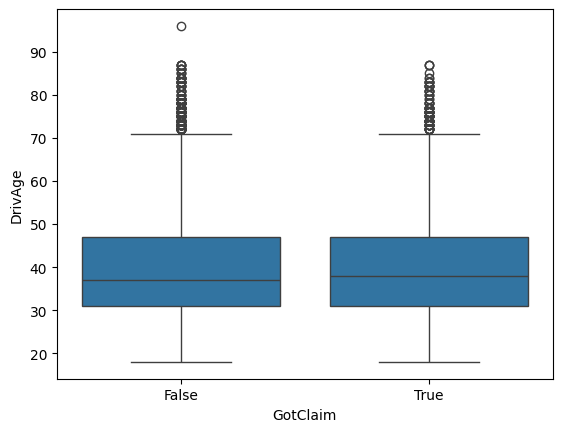

In [18]:
sns.boxplot(train, y = 'DrivAge', x = 'GotClaim')
plt.show()

<Axes: xlabel='DrivGender', ylabel='Count'>

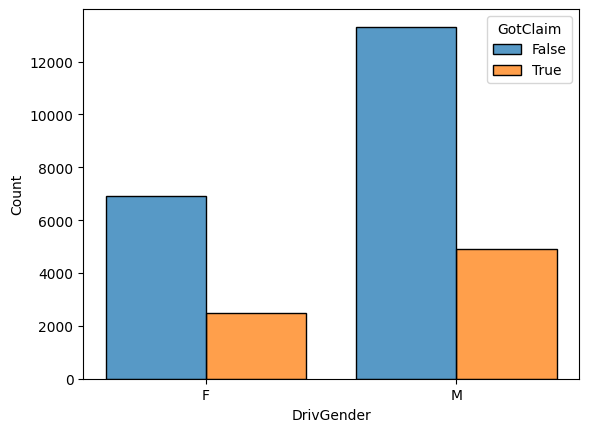

In [20]:
sns.histplot(train, x = 'DrivGender', hue = 'GotClaim', multiple="dodge", shrink=.8)

In [28]:
y = train['GotClaim']
X = train.drop(columns=['GotClaim'])

# Prepare the Machine Learning Pipelines

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [30]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [31]:
pipe_lr = Pipeline(
    steps=[("preprocessor", preprocessor), ("LR", LogisticRegression(random_state=SEED))]
)

pipe_rf = Pipeline(
    steps=[("preprocessor", preprocessor), ("RF", RandomForestClassifier(random_state=SEED))]
)

In [32]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]

lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]

rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]

In [33]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)

rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3)

In [34]:
grids = [lr_grid_search, rf_grid_search]
models_fitted = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
for pipe in grids:
    tmp = pipe.fit(X_train,y_train)
    print("model score: %.3f" % tmp.score(X_test, y_test))
    models_fitted.append(tmp)

model score: 0.739
model score: 0.740
